# Homework 1: Reading data and regression
## Due September 5th

In class we've been working on developing the tools for linear regression.  In this homework, we'll use those tools to show that one of the original 'big data' problems can be solved quite credibly with ordinary least squares.  Note that this exercise is primarily intended to do two things: 1) provide you with some practice gathering data, and 2) evaluate your ability to reason somewhat abstractly about models.  With respect to the second point, it is in your grade's interest to provide complete and well-reasoned answers to narrative questions posed.  A correct answer can be awarded very few points if its reasoning is absent or unclear, and an incorrect answer can be awarded full points if it is well argued.   

Please turn in your work via github classroom.

## The big one
If you've ever lived in an area prone to seismic activity, you know that people are always a little apprehensive about *the big one*, that giant earthquake (Magnitude greater than 7) that is going to break the pots and collapse the overpasses.  However, the big one rarely happens... until it does.  What happens more frequently is smaller earthquakes.  And even more frequently than that, even smaller earthquakes.  In fact, it's long been understood that earthquake frequency has an inverse relationship with magnitude.  Here, we're going to quantify that relationship for the west coast of the US.  

## Data wrangling
The first thing that we'll need to do is to aquire a dataset that can help us say something about earthquake frequency.  Fortunately, the United States Geologic Survey keeps such a database.  

First, navigate to https://earthquake.usgs.gov/earthquakes/search/.  This is the USGS' central repository for earthquake data.  We'll be interested in data from the last twenty years.  Enter the appropriate date.  Next, we're interested in data from the west coast of the lower 48.  Use the Custom Geographic Region button on the right side of the page, followed by the Draw Rectangle on the Map button.  Draw a rectangle around the west coast, from the Canadian to Mexican border.  Next, open the Output Options tab and select .csv (comma separated values, a plain text format).  Finally, under Limit Results, enter 19999 (the site will throw an error if you make this value bigger).  This series of commands will deliver the ~20k most recent earthquakes of all sizes to occur in this region of the world.  It may take a moment for their server to pull your query together. Download the file.

Next, import the data into ipython.  This is easily done with [Pandas' read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [1]:
%matplotlib inline

# Use pandas to import the earthquake data file here
import pandas as pd 

eq_df = pd.read_csv('datasets/west_coast_earthquakes.csv')

Interrogate the Pandas dataframe for the available fields using its built in method 'keys'


In [2]:
eq_df.keys

<bound method NDFrame.keys of                            time   latitude   longitude   depth   mag magType  \
0      2019-08-30T23:07:54.670Z  39.480499 -122.950996  14.050  2.54      md   
1      2019-08-30T19:54:43.370Z  36.207667 -117.856500   2.980  2.52      ml   
2      2019-08-30T19:03:58.240Z  37.469334 -118.845665   5.650  2.67      md   
3      2019-08-30T16:38:20.570Z  37.466667 -118.844002   5.230  2.64      md   
4      2019-08-30T14:52:41.390Z  37.364834 -118.525169  10.720  2.50      ml   
...                         ...        ...         ...     ...   ...     ...   
19994  2005-07-24T03:33:14.980Z  46.184333 -122.198500  -1.760  2.80      md   
19995  2005-07-23T20:29:43.900Z  46.196667 -122.194000  -1.939  2.60      md   
19996  2005-07-23T15:30:07.300Z  46.203167 -122.195667  -1.693  2.50      md   
19997  2005-07-23T12:31:27.830Z  38.796333 -122.793833   3.092  3.19      ml   
19998  2005-07-23T09:38:19.450Z  46.196333 -122.191833  -1.729  3.20      md   

        n

We're primarily interested in determining the relationship between relative frequency and magnitude.  Extract the magnitude variable from the pandas data frame using the 'mag' key.  

Next, you'll need to determine the number of earthquakes that occured in the data as a function of magnitude.  This is easily done by deciding on a set of bins, and then counting the number of items in each bin.  This is also known as a [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and is easily computed using either numpy or matplotlib.  You'll want to use a fairly large number of bins, say 50 (equally spaced).  *Note that the histogram function provided by either of the above libraries returns total counts rather than relative frequencies: you'll need to compute relative frequencies by dividing the returned counts by the total number of earthquakes in the dataset.*

**(20 pts) Make a plot with bin centroids on the $x$-axis and relative frequency on the $y$-axis.  Based on your results, please provide a few sentences describing whether the model $y = w_0 + w_1 x$ is a good fit to the data, if $x$ represents earthquake magnitude and $y$ represents relative frequency.**

The model $y = w_0 + w_1 x$ would not be a good fit to the data. Such a model assumes that the relationship between $x$ (the magnitude) and $y$ (the relative frequency) is linear. One can see by looking at the histogram below that the relationship is exponential in some way. Put another way, the residual with a exponential rather than linear model would be much lower.

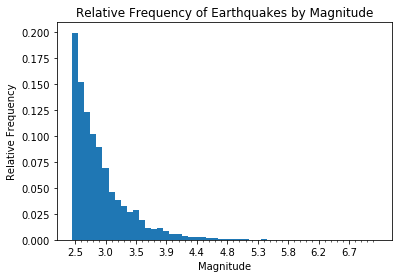

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

fig, ax = plt.subplots()

relative_freq, bins, _ = ax.hist(
    eq_df.mag, bins=50, weights=np.ones(len(eq_df.mag)) / len(eq_df.mag))
centroids = bins[:-1] + (bins[1] - bins[0])/2

ax.set_title('Relative Frequency of Earthquakes by Magnitude')
ax.set_xlabel('Magnitude')
ax.set_ylabel('Relative Frequency')
ax.set_xticks(centroids[::5])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f"))
ax.set_xticks(centroids, minor=True)

plt.show()

As it turns out, a physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics, and is given by a so-called *power-law*
$$
y = ax^b
$$
**(20pts) If you wanted to directly fit this power-law model to these data, would you be able to use the linear regression code that we've already developed to do so?  If so, how?  If not, why not?**

Linear regression tries to fit the data to the model $y = w_0 + w_1 x$, a linear model. Since both the data and physics tells us that our data is not represented by a linear model, but instead a power law, linear regression would not fit the data particularly accurately.

 As it turns out, it is not possible to use linear regression to fit this model directly.  However, it can be done by using a clever transformation of the data.  **(20pts) Plot the base-10 logarithm of the event counts.  Now does a linear model seem like a good fit?  If the power law is a good fit to the untransformed data, why does it make sense that a linear model should fit the log-transformed data (HINT: take the logarithm of both sides of the power law)**

**(UPDATE!)** I should have noted this before: The earthquake magnitude $x$ has *already* been log-transformed, which is to say that a magnitude 7 is 10 times more powerful than a magnitude 6.  The power law stated above applies to the earthquake strength prior to it having the logarithm taken.  As such, a more reasonable way to state the question would be as follows: A physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics and is given by a so-called *power-law*
$$
y = a P^b,
$$
where $P=10^x$. Show that taking the logarithm of both sides of this equation leads to a linear relationship between the earthquake magnitude $x$ and the log-frequency $\text{log}_{10}(y)$. 

Starting from the equation $y = a (10^x)^b $ if we take the log of both sides we arrive at $\text{log}_{10}(y) = \text{log}_{10}(a) + b x$. The log of $y$ is now related to $x$ only by a constant term and a multiplier, no exponentials. Also known as a linear relationship. One can also see by plotting the points with a logarithmic scale the 

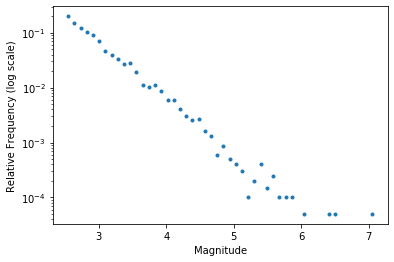

In [4]:
plt.plot(centroids, relative_freq, '.')
ax.set_title('Relative Frequency of Earthquakes by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Relative Frequency (log scale)')
plt.yscale('log')

plt.show()

Finally, **(40pts) use one of the methods that you developed for linear regression in class to fit a line to the log-transformed counts.  What is the slope of that line?  Is the model a good fit for all sizes of earthquake?**

!Answers go here

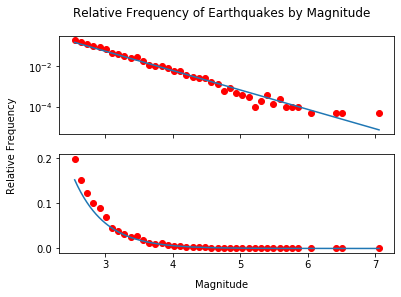

Slope of line fit to log transformed relative frequencies: -0.9547418672849235


In [68]:
from numpy import linalg as LA

# Compute the Vandermonde matrix of degree d
#  input:
#    x:np.array(n,):f64 - input data
#    d:int              - degree
#  output:
#    np.array(n,d+1):f64 - Vandermonde matrix
def vendermonde_matrix(x, d):
    x_matrix = np.ones((len(x), d+1))
    for i in range(1, d+1):
        x_matrix[:, i] = x**i
    return x_matrix

# Remove data in the circumstances where there
# where too few earthquakes of that magnitude 
# to register anything above a zero relative 
# frequency.
zero_mask = relative_freq > 0

# compute linear solution
ven_m = vendermonde_matrix(centroids[zero_mask], 1)
w = LA.solve(np.dot(ven_m.T, ven_m), np.dot(ven_m.T, np.log10(relative_freq[zero_mask])))

# plot
xs = np.linspace(centroids.min(),centroids.max(), 200)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

fig.text(0.5, 0.004, 'Magnitude', ha='center')
fig.text(0.004, 0.5, 'Relative Frequency', va='center', rotation='vertical')

for i in range(2):
    axs[i].plot(centroids[zero_mask], relative_freq[zero_mask], 'ro')
    axs[i].plot(xs, np.power(10, w[0]) * np.power(10, w[1] * xs))
 
fig.suptitle('Relative Frequency of Earthquakes by Magnitude')
axs[0].set_yscale('log', basey=10)
axs[1].set_yscale('linear')

plt.show()

print(f'Slope of line fit to log transformed relative frequencies: {w[1]}')

The model appears to be less predictive as we move into the higher magnitude earthquakes. This could simply be because of the lack of data given the infrequency of theses monster quakes, it's also possible that a higher degree polynomial could fit the data better.